In [1]:
from skimage import io

url = 'https://raw.githubusercontent.com/kevinyamauchi/napari-spot-detection-tutorial/main/data/nuclei_cropped.tif'
nuclei = io.imread(url)

In [2]:
import napari

viewer = napari.view_image(nuclei, colormap='magma')

Validation errors in config file(s).
The following fields have been reset to the default value:

schema_version
  value is not a valid tuple (type=type_error.tuple)



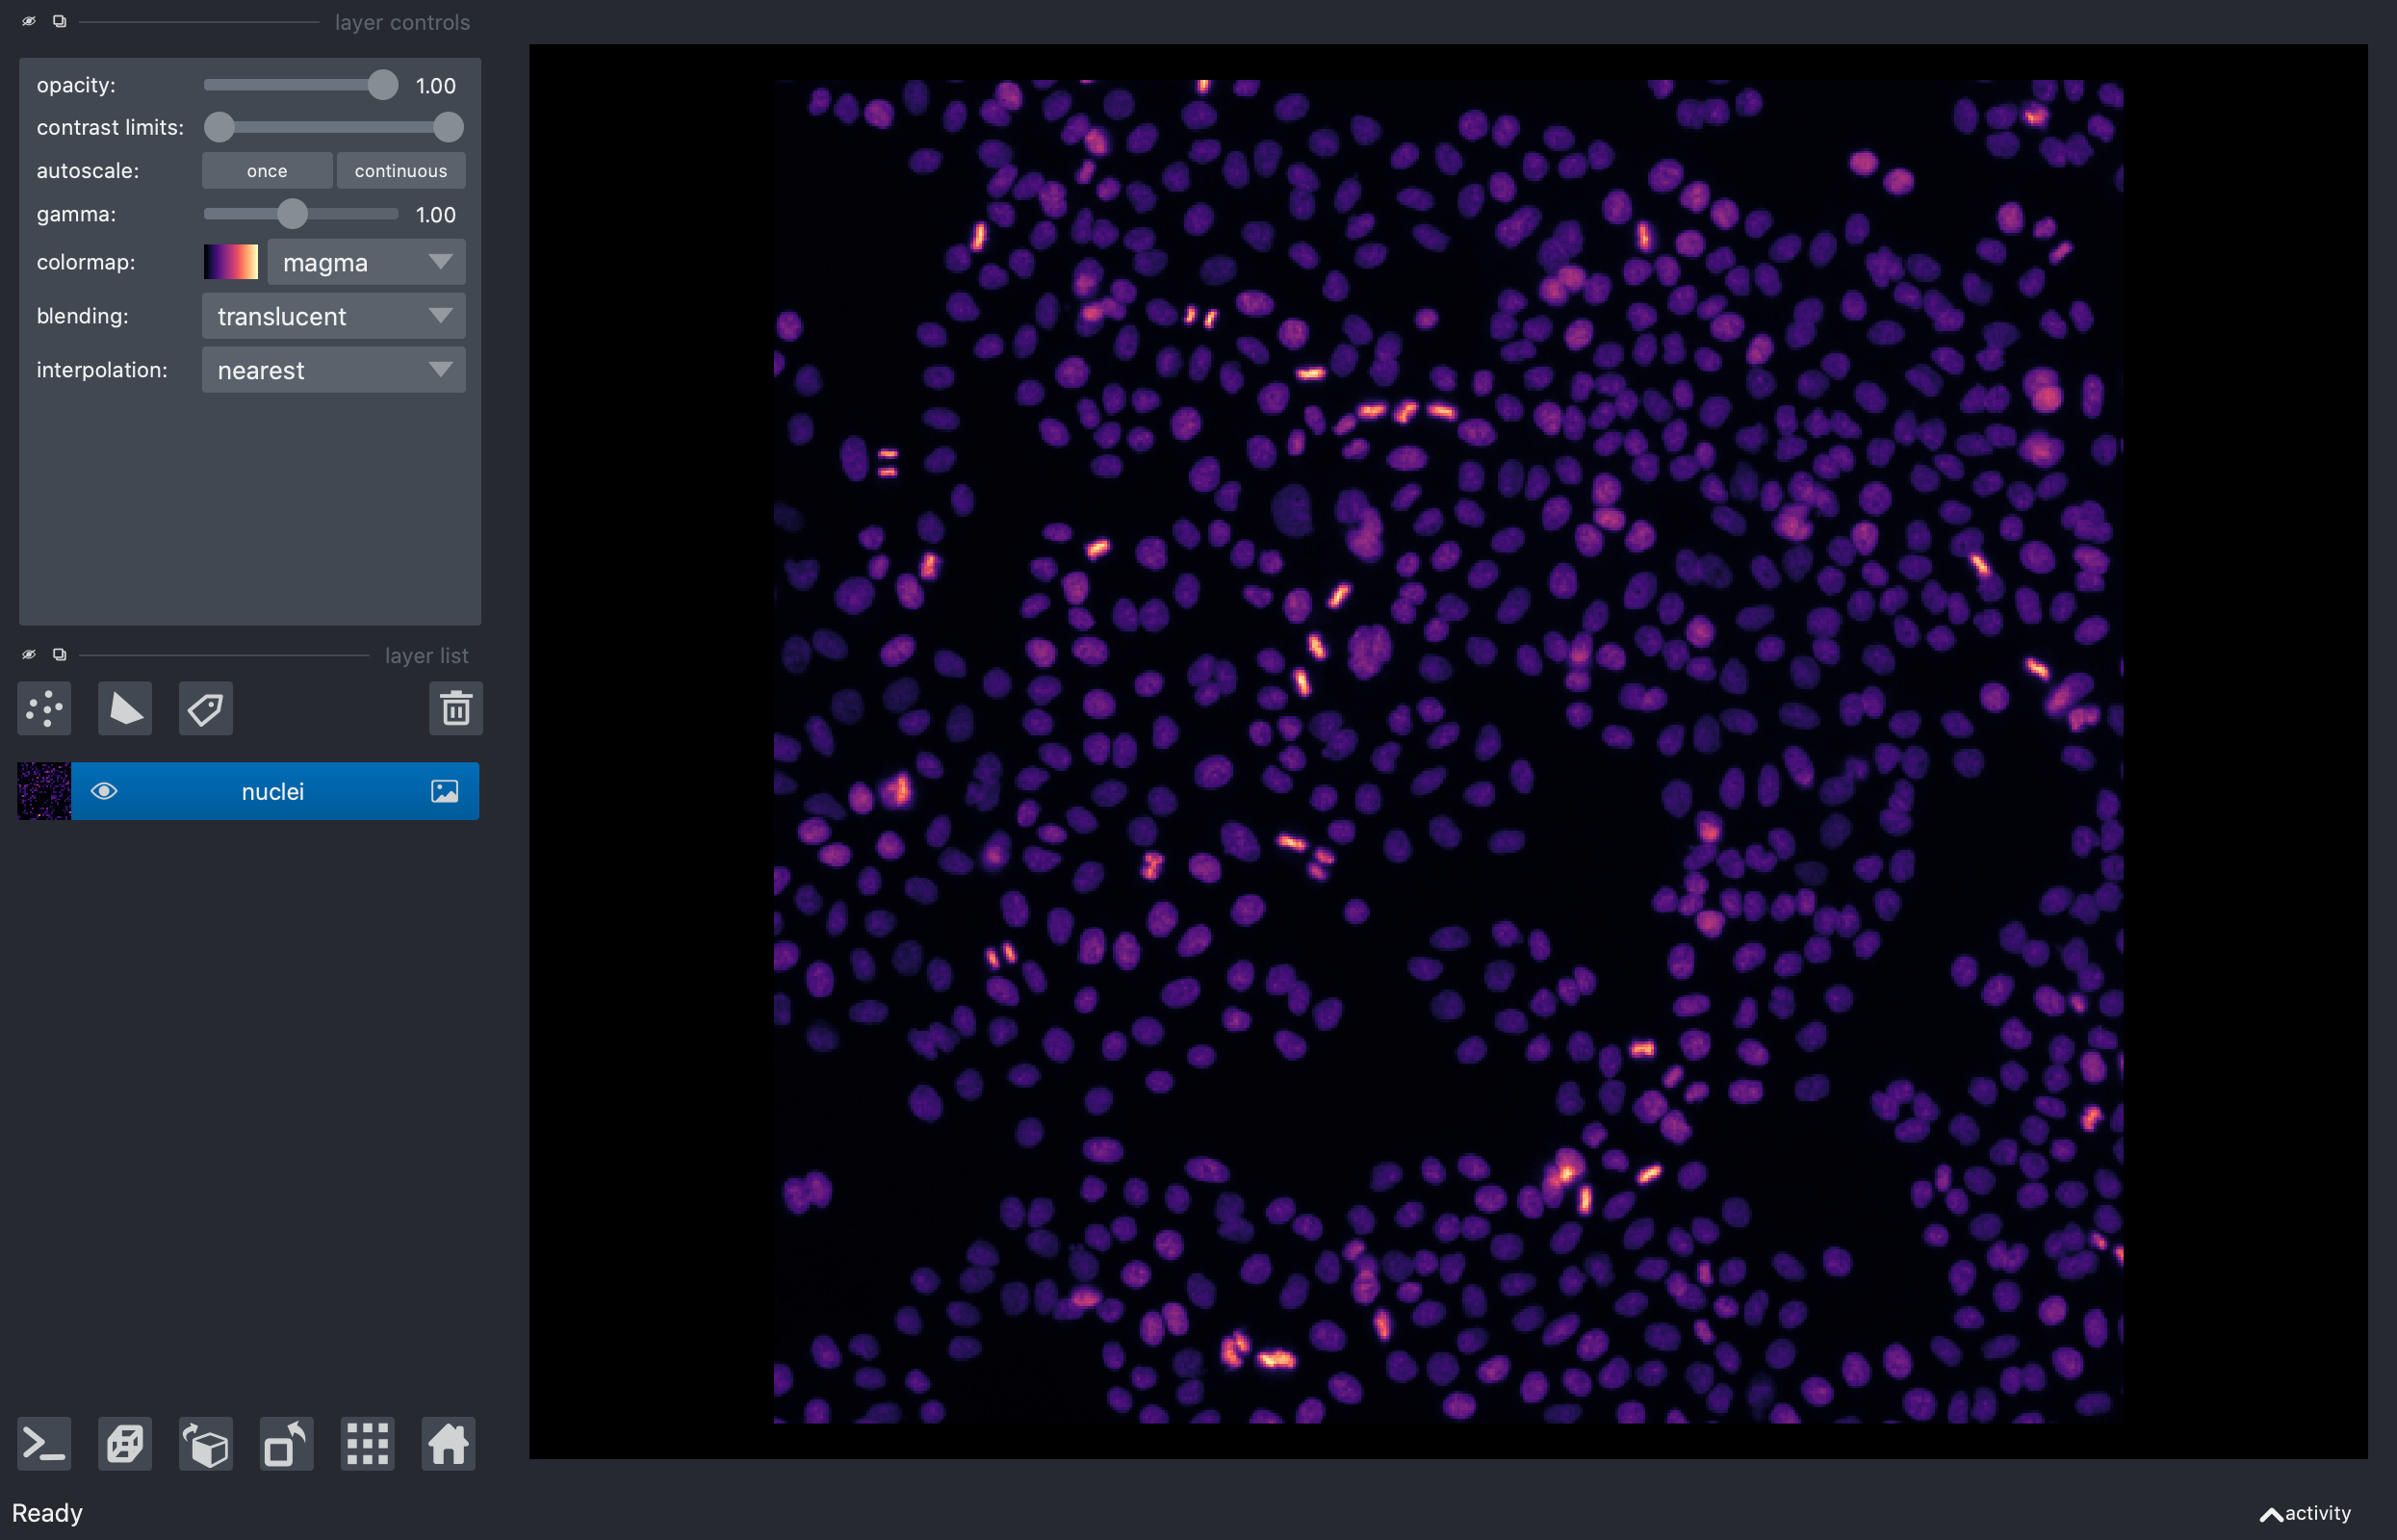

In [3]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

In [4]:
from skimage.io import imread

label_im = imread('./data/stardist_masks.png')
viewer.add_labels(label_im, name='StarDist labels')

<Labels layer 'StarDist labels' at 0x7fd2076dfca0>

In [5]:
from skimage.measure import regionprops_table

# measure the area and nucleus for each nucleus
label_layer = viewer.layers['StarDist labels']
rp_table = regionprops_table(
    label_layer.data,
    properties=('area', 'perimeter')
)

median area: 281.0 px


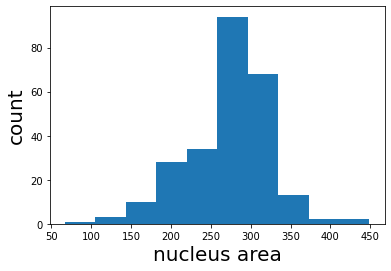

In [6]:
from matplotlib import pyplot as plt
import numpy as np


# print the median area
median_area = np.median(rp_table['area'])
print(f'median area: {median_area} px')

# plot a histogram of the areas
plt.hist(rp_table['area']);
plt.xlabel('nucleus area', fontsize=20);
plt.ylabel('count', fontsize=20);
plt.show();

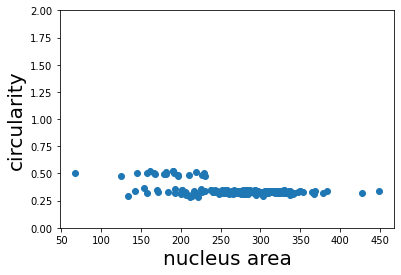

In [7]:
# calculate the circularity of the nuclei
circularity = (4 * np.pi * rp_table['area']) / np.square(rp_table['perimeter'])

# use matplot lib to visualize the relationship between nucleus circularity and area
plt.scatter(rp_table['area'], circularity);
plt.xlabel('nucleus area', fontsize=20);
plt.ylabel('circularity', fontsize=20);
plt.ylim((0, 2))
plt.show()